# 1. 분석 기획
- 미국 인구 조사국에서 수집한 보스턴 시의 주택 가격에 대한 데이터를 통해 주택의 가격에 영향을 미치는 주요 인자를 확인하고, 모델 개발을 통하여 주택 가격을 정확히 예측하고자 한다.
- boston_housing.csv 
- 변수: 14 개, 자료 수 : 506 개

- 현장에 적용했을 때 가치가 있는가
### *목표: 데이터 분석을 통한 보스턴의 주택 가격 예측 정확도 향상*

# 2. 데이터 수집

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

In [2]:
df_raw = pd.read_csv('data/boston_housing.csv')
df_raw.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


###### 데이터 특성 확인

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    504 non-null    float64
 4   CHAS     506 non-null    int64  
 5   NOX      504 non-null    float64
 6   RM       504 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df_raw.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,504.000000,506.000000,504.000000,504.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.140099,0.069170,0.554797,6.284825,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.873751,0.253994,0.116095,0.703950,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.175000,0.000000,0.449000,5.884750,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.626000,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


In [5]:
df_raw.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      2
CHAS       0
NOX        2
RM         2
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

- 결측치 확인

<AxesSubplot:>

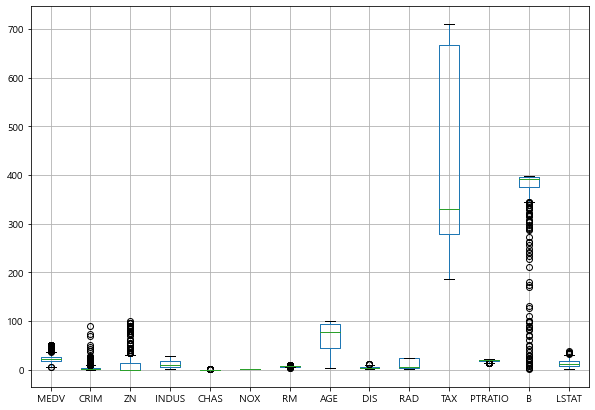

In [13]:
df_raw.boxplot(figsize = (10, 7))

- 연속형 변수의 분포 특성 확인

In [14]:
df_raw.columns

Index(['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

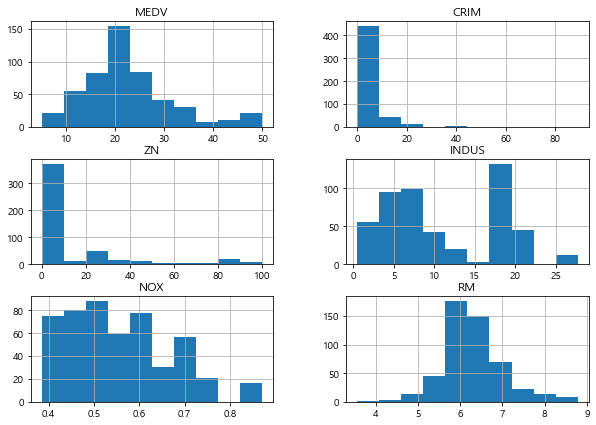

In [21]:
df_raw[['MEDV', 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM']].hist(figsize = (10, 7));

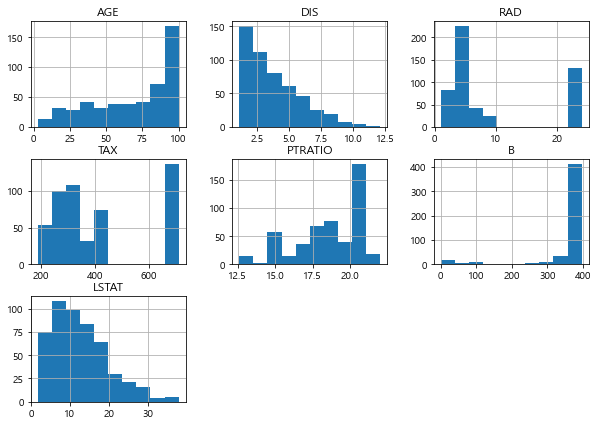

In [22]:
df_raw[['AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].hist(figsize = (10, 7));

- 범주형 변수의 특성 확인

In [23]:
df_raw['CHAS'].unique()

array([0, 1], dtype=int64)

###### 결측치 처리

In [25]:
df_raw.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      2
CHAS       0
NOX        2
RM         2
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [29]:
#  평균으로 대체
round(df_raw['INDUS'].mean(), 3)

11.14

In [30]:
df_raw['INDUS'] = df_raw['INDUS'].fillna(round(df_raw['INDUS'].mean(), 3))

In [31]:
df_raw['NOX'] = df_raw['NOX'].fillna(round(df_raw['NOX'].mean(), 3))

In [32]:
df_raw['RM'] = df_raw['RM'].fillna(round(df_raw['RM'].mean(), 3))

In [33]:
df_raw.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

# 3. 탐색적 분석

- 목표변수와 설명변수간의 특성 확인

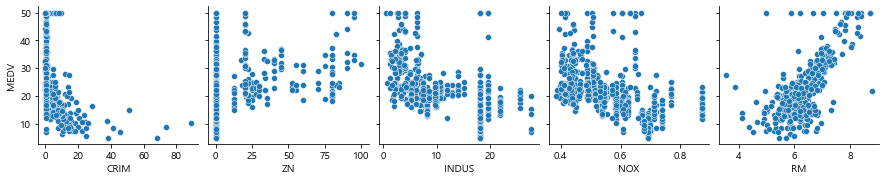

In [36]:
sns.pairplot(x_vars= ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM'], y_vars= ['MEDV'], data = df_raw)

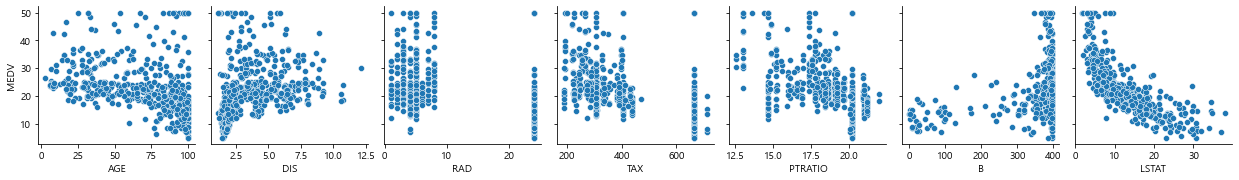

In [37]:
sns.pairplot(x_vars= ['AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], y_vars= ['MEDV'], data = df_raw)

- 양의 상관관계: RM, DIS, B  
- 음의 상관관계: CRIM, NOX, INDUS, LSTAT, (TAX, AGE)

###### 통계적 가설 검정

- 강조망권에 대한 집값 확인

<AxesSubplot:xlabel='CHAS', ylabel='MEDV'>

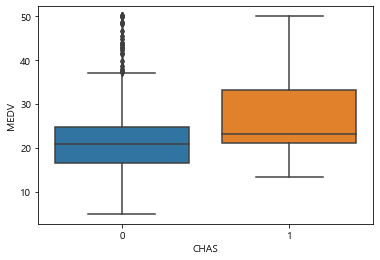

In [38]:
sns.boxplot(data = df_raw, x = 'CHAS', y = 'MEDV')

<AxesSubplot:title={'center':'MEDV'}, xlabel='[CHAS]'>

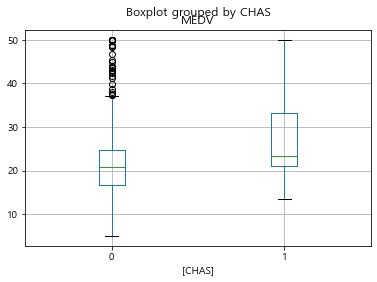

In [39]:
df_raw.boxplot(column = 'MEDV', by = ['CHAS'])

- 통계적 가설 검정을 위한 데이터 분리

In [41]:
df_raw_chas1 = df_raw.loc[df_raw['CHAS'] == 0, 'MEDV']
df_raw_chas2 = df_raw.loc[df_raw['CHAS'] == 1, 'MEDV']

In [43]:
# 정규성 검정

statistic, p = shapiro(df_raw_chas1)
print("df_raw_chas1; shapiro - Wilk Test : statistic = {}, p-value = {}".format(statistic, p))
statistic, p = shapiro(df_raw_chas2)
print("df_raw_chas2; shapiro - Wilk Test : statistic = {}, p-value = {}".format(statistic, p))

df_raw_chas1; shapiro - Wilk Test : statistic = 0.9282605051994324, p-value = 3.113930960958397e-14
df_raw_chas2; shapiro - Wilk Test : statistic = 0.8359232544898987, p-value = 0.00011230883683310822


- 둘 다 정규성을 띄지 않음 -> 비모수 평균검정

In [44]:
# 

stats.mannwhitneyu(df_raw_chas1, df_raw_chas2)

MannwhitneyuResult(statistic=5605.5, pvalue=0.0015816705011294974)

- 대립가설 채택, 강조망권에 따른 집값에는 차이가 있다.

In [46]:
df_raw['CRIM'].mean()

3.6135235608162057

In [65]:
df_raw_crim1 = df_raw.loc[df_raw['CRIM'] <= 3.61, 'MEDV']
df_raw_crim2 = df_raw.loc[df_raw['CRIM'] > 3.61, 'MEDV']

In [66]:
statistic, p = shapiro(df_raw_crim1)
print("df_raw_crim1; shapiro - Wilk Test : statistic = {}, p-value = {}".format(statistic, p))
statistic, p = shapiro(df_raw_crim2)
print("df_raw_crim2; shapiro - Wilk Test : statistic = {}, p-value = {}".format(statistic, p))

df_raw_crim1; shapiro - Wilk Test : statistic = 0.8874213099479675, p-value = 4.918053286259759e-16
df_raw_crim2; shapiro - Wilk Test : statistic = 0.7724092602729797, p-value = 8.216392518613225e-13


In [67]:
# 비모수
stats.mannwhitneyu(df_raw_crim1, df_raw_crim2)

MannwhitneyuResult(statistic=40108.0, pvalue=8.76692699023472e-29)

- 대립가설 채택, 범죄율에 따른 집값에는 차이가 있다.

In [68]:
df_raw['ZN'].mean()

11.363636363636363

In [70]:
df_raw_zn1 = df_raw.loc[df_raw['ZN'] <= 11.36, 'MEDV']
df_raw_zn2 = df_raw.loc[df_raw['ZN'] > 11.36, 'MEDV']

In [71]:
statistic, p = shapiro(df_raw_zn1)
print("df_raw_zn1; shapiro - Wilk Test : statistic = {}, p-value = {}".format(statistic, p))
statistic, p = shapiro(df_raw_zn2)
print("df_raw_zn2; shapiro - Wilk Test : statistic = {}, p-value = {}".format(statistic, p))

df_raw_zn1; shapiro - Wilk Test : statistic = 0.8783591389656067, p-value = 1.5093558019810196e-16
df_raw_zn2; shapiro - Wilk Test : statistic = 0.9147244691848755, p-value = 3.6262400726627675e-07


In [72]:
# 비모수 검정
stats.mannwhitneyu(df_raw_zn1, df_raw_zn2)

MannwhitneyuResult(statistic=10852.0, pvalue=3.1171712786065326e-22)

- 대립가설 채택, 주거지 비율에 따른 집값에는 차이가 있다.

In [73]:
df_raw['INDUS'].mean()

11.140098906883406

In [74]:
df_raw_indus1 = df_raw.loc[df_raw['INDUS'] <= 11.14, 'MEDV']
df_raw_indus2 = df_raw.loc[df_raw['INDUS'] > 11.14, 'MEDV']

In [75]:
statistic, p = shapiro(df_raw_indus1)
print("df_raw_indus1; shapiro - Wilk Test : statistic = {}, p-value = {}".format(statistic, p))
statistic, p = shapiro(df_raw_indus2)
print("df_raw_indus2; shapiro - Wilk Test : statistic = {}, p-value = {}".format(statistic, p))

df_raw_indus1; shapiro - Wilk Test : statistic = 0.8949769139289856, p-value = 2.1410233612059737e-13
df_raw_indus2; shapiro - Wilk Test : statistic = 0.8113635778427124, p-value = 2.67613558707126e-15


In [76]:
# 비모수 검정
stats.mannwhitneyu(df_raw_indus1, df_raw_indus2)

MannwhitneyuResult(statistic=49333.5, pvalue=4.229247845674243e-29)

- 대립가설 채택, 비소매업 비율에 따른 집값에는 차이가 있다.

###### 전부 정규성 안 띈다고 하니까 생략하자 원래는 항목마다 다 정규성 검정 해줘야 됨

In [77]:
df_raw['NOX'].mean()

0.5547978270909084

In [79]:
df_raw_NOX1 = df_raw.loc[df_raw['NOX'] <= 0.55, 'MEDV']
df_raw_NOX2 = df_raw.loc[df_raw['NOX'] > 0.55, 'MEDV']

In [80]:
# 비모수 검정
stats.mannwhitneyu(df_raw_NOX1, df_raw_NOX2)

MannwhitneyuResult(statistic=48317.0, pvalue=1.0971055655801226e-25)

- 대립가설 채택, 집값에 차이 있다

In [82]:
df_raw['RM'].mean()

6.2848260884723395

In [84]:
df_raw_RM1 = df_raw.loc[df_raw['RM'] <= 6.28, 'MEDV']
df_raw_RM2 = df_raw.loc[df_raw['RM'] > 6.28, 'MEDV']

In [85]:
# 비모수 검정
stats.mannwhitneyu(df_raw_RM1, df_raw_RM2)

MannwhitneyuResult(statistic=13142.5, pvalue=7.772083418790219e-30)

- 대립가설 채택, 집값에 차이 있다

In [87]:
df_raw['AGE'].mean()

68.57490120115612

In [88]:
df_raw_AGE1 = df_raw.loc[df_raw['AGE'] <= 66.57, 'MEDV']
df_raw_AGE2 = df_raw.loc[df_raw['AGE'] > 66.57, 'MEDV']

In [89]:
# 비모수 검정
stats.mannwhitneyu(df_raw_AGE1, df_raw_AGE2)

MannwhitneyuResult(statistic=47630.5, pvalue=4.017149296864012e-25)

- 대립가설 채택, 집값에 차이 있다

In [90]:
df_raw['DIS'].mean()

3.7950426960059325

In [91]:
df_raw_DIS1 = df_raw.loc[df_raw['DIS'] <= 3.79, 'MEDV']
df_raw_DIS2 = df_raw.loc[df_raw['DIS'] > 3.79, 'MEDV']

In [92]:
# 비모수 검정
stats.mannwhitneyu(df_raw_DIS1, df_raw_DIS2)

MannwhitneyuResult(statistic=20205.5, pvalue=2.6402010807911286e-11)

- 대립가설 채택, 집값에 차이 있다

In [93]:
df_raw['RAD'].mean()

9.549407114624506

In [94]:
df_raw_RAD1 = df_raw.loc[df_raw['RAD'] <= 9.55, 'MEDV']
df_raw_RAD2 = df_raw.loc[df_raw['RAD'] > 9.55, 'MEDV']

In [95]:
# 비모수 검정
stats.mannwhitneyu(df_raw_RAD1, df_raw_RAD2)

MannwhitneyuResult(statistic=40401.0, pvalue=1.3939897066397528e-27)

- 대립가설 채택, 집값에 차이 있다

In [96]:
df_raw['TAX'].mean()

408.2371541501976

In [97]:
df_raw_TAX1 = df_raw.loc[df_raw['TAX'] <= 408.2, 'MEDV']
df_raw_TAX2 = df_raw.loc[df_raw['TAX'] > 408.2, 'MEDV']

In [98]:
# 비모수 검정
stats.mannwhitneyu(df_raw_TAX1, df_raw_TAX2)

MannwhitneyuResult(statistic=47445.0, pvalue=8.941399667554904e-35)

- 대립가설 채택, 집값에 차이 있다

In [99]:
df_raw['PTRATIO'].mean()

18.45553382776679

In [100]:
df_raw_PTRATIO1 = df_raw.loc[df_raw['PTRATIO'] <= 18.45, 'MEDV']
df_raw_PTRATIO2 = df_raw.loc[df_raw['PTRATIO'] > 18.45, 'MEDV']

In [101]:
# 비모수 검정
stats.mannwhitneyu(df_raw_PTRATIO1, df_raw_PTRATIO2)

MannwhitneyuResult(statistic=49200.5, pvalue=2.1601347314480263e-28)

- 대립가설 채택, 집값에 차이 있다

In [102]:
df_raw['B'].mean()

356.67402960597883

In [103]:
df_raw_B1 = df_raw.loc[df_raw['B'] <= 356.67, 'MEDV']
df_raw_B2 = df_raw.loc[df_raw['B'] > 356.67, 'MEDV']

In [104]:
# 비모수 검정
stats.mannwhitneyu(df_raw_B1, df_raw_B2)

MannwhitneyuResult(statistic=7960.5, pvalue=2.3922022994869505e-18)

- 대립가설 채택, 집값에 차이 있다

In [105]:
df_raw['LSTAT'].mean()

12.653063233922925

In [106]:
df_raw_LSTAT1 = df_raw.loc[df_raw['LSTAT'] <= 12.65, 'MEDV']
df_raw_LSTAT2 = df_raw.loc[df_raw['LSTAT'] > 12.65, 'MEDV']

In [107]:
# 비모수 검정
stats.mannwhitneyu(df_raw_LSTAT1, df_raw_LSTAT2)

MannwhitneyuResult(statistic=57890.5, pvalue=1.6041345095648517e-58)

- 대립가설 채택, 집값에 차이 있다

###### 상관 분석

<AxesSubplot:>

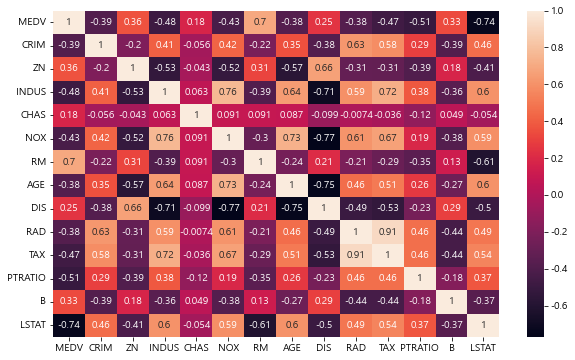

In [108]:
df_cor = df_raw.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(df_cor, annot = True)

# 4. 모델링

In [112]:
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula9
import statsmodels.formula.api as smf
# 평가함수
from statsmodels.tools.eval_measures import rmse
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 결정계수 평가지수
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

###### 다중선형회귀

In [113]:
df_train, df_test = train_test_split(df_raw, test_size=0.3, random_state=1234)
print('학습용 데이터의 크기: {}'.format(df_train.shape))
print('평가용 데이터의 크기: {}'.format(df_test.shape))

학습용 데이터의 크기: (354, 14)
평가용 데이터의 크기: (152, 14)


In [115]:
# 선형 회귀 분석

reg_model = smf.ols(formula = "MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", data = df_train)

# 적합한가
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     70.71
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           2.75e-88
Time:                        10:35:40   Log-Likelihood:                -1048.5
No. Observations:                 354   AIC:                             2125.
Df Residuals:                     340   BIC:                             2179.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.1852      6.229      8.217      0.0

In [116]:
# 회귀계수 판단, 인더스 제외


reg_model = smf.ols(formula = "MEDV ~ CRIM + ZN + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", data = df_train)

# 적합한가
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     76.79
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           3.27e-89
Time:                        10:36:48   Log-Likelihood:                -1048.6
No. Observations:                 354   AIC:                             2123.
Df Residuals:                     341   BIC:                             2174.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.2573      6.218      8.243      0.0

In [117]:
# 회귀계수 판단, 에이지도 제외


reg_model = smf.ols(formula = "MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT", data = df_train)

# 적합한가
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     83.95
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           3.83e-90
Time:                        10:37:08   Log-Likelihood:                -1048.7
No. Observations:                 354   AIC:                             2121.
Df Residuals:                     342   BIC:                             2168.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.1860      6.209      8.244      0.0

- 조정 결정계수 : 0.721
- ANOVA F검정 p 밸류 : 3.83e-90
- 잔차 정규성 0.00 -> 정규성 안 띈다???
- 독립성 띔.

###### 다중회귀는 사용 불가 ㅠㅠ

In [118]:
# 설명변수간의 다중공선성 확인

df_raw_x = df_train.drop(columns = ['MEDV', 'INDUS', 'AGE'])

In [121]:
# 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)
df_raw_x_const.head()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
99,1.0,0.06860,0.0,0,0.445,7.416,3.4952,2,276,18.000000,396.899994,6.190000
102,1.0,0.22876,0.0,0,0.520,6.405,2.7147,5,384,20.900000,70.800003,10.630000
416,1.0,10.83420,0.0,0,0.679,6.782,1.8195,24,666,20.200001,21.570000,25.790001
266,1.0,0.78570,20.0,0,0.647,7.014,2.1329,5,264,13.000000,384.070007,14.790000
101,1.0,0.11432,0.0,0,0.520,6.781,2.8561,5,384,20.900000,395.579987,7.670000


In [124]:
# 데이터프레임으로 저장
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

#VIF 정렬
df_vif.sort_values('VIF', inplace = True)
df_vif.round(3)

,variable,VIF
3,CHAS,1.059
10,B,1.426
1,CRIM,1.676
9,PTRATIO,1.737
5,RM,1.783
2,ZN,2.167
11,LSTAT,2.292
6,DIS,3.413
4,NOX,3.790
7,RAD,7.753


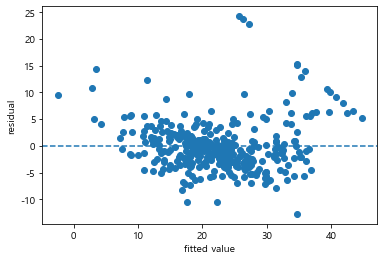

In [126]:
# 오차의 기본 가정 검토

# 등분산성 검증

plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y = 0, linestyle = '--')


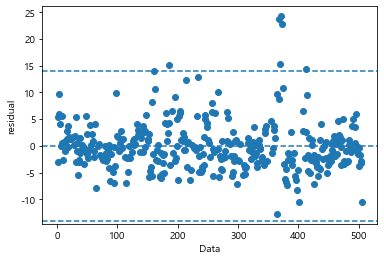

In [125]:
# 잔차 독립성

plt.scatter(df_train.index, reg_result.resid, marker = 'o')
plt.xlabel('Data')
plt.ylabel('residual')
plt.axhline(y = 0, linestyle = '--')
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = '--')
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = '--')

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


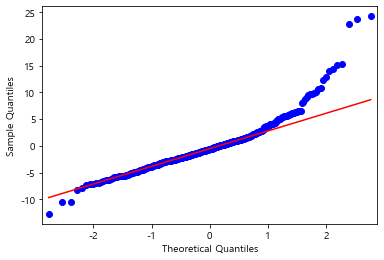

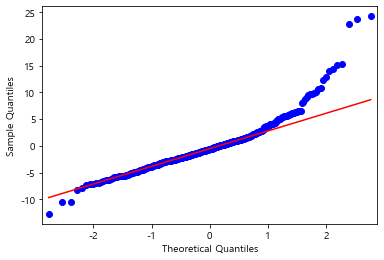

In [127]:
# 잔차 정규성 검정 : QQplot

qqplot(reg_result.resid, line = 'q')

###### Decision Tree

In [129]:
df_raw_y = df_raw['MEDV']
df_raw_x = df_raw.drop(columns = 'MEDV', inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state=1234)

print('학습용 데이터의 X 크기: {}'.format(df_train_x.shape))
print('학습용 데이터의 Y 크기: {}'.format(df_train_y.shape))
print('평가용 데이터의 X 크기: {}'.format(df_test_x.shape))
print('평가용 데이터의 X 크기: {}'.format(df_test_y.shape))

학습용 데이터의 X 크기: (354, 13)
학습용 데이터의 Y 크기: (354,)
평가용 데이터의 X 크기: (152, 13)
평가용 데이터의 X 크기: (152,)


In [131]:
# 모델 생성, 기본 옵션으로 트리 생성

tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print('학습용 데이터의 설명력: {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('평가용 데이터의 설명력: {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

학습용 데이터의 설명력: 1.000
평가용 데이터의 설명력: 0.856


- 최적 파라미터 탐색

In [133]:
# manual search
#학습용 및 평가용 설명력 결과 저장
train_score = []
test_score = []

# min samples leaf : 잎사귀 최소 자료 수
para_depth = [n_depth for n_depth in range(1, 20)]

for v_max_depth in para_depth:
    manual_dt = DecisionTreeRegressor(random_state=1234, max_depth = v_max_depth)
    manual_dt.fit(df_train_x, df_train_y)
    train_score.append(manual_dt.score(df_train_x, df_train_y))
    test_score.append(manual_dt.score(df_test_x, df_test_y))   

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth['MaxDepth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

df_score_depth.round(3)

,MaxDepth,TrainScore,TestScore
0,1,0.442,0.443
1,2,0.692,0.711
2,3,0.812,0.764
3,4,0.895,0.839
4,5,0.927,0.850
5,6,0.947,0.833
6,7,0.963,0.853
7,8,0.977,0.847
8,9,0.984,0.843
9,10,0.990,0.859


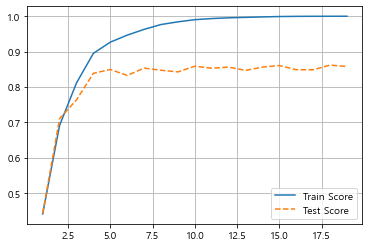

In [139]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.grid()
plt.legend()

In [207]:
# 변수명 저장
v_feature_name = df_train_x.columns

# depth = 10 으로 지정한 모델, min_samples_leaf=4
manual_dt = DecisionTreeRegressor(random_state=1234, max_depth=9, min_samples_leaf=5, min_samples_split= 10)
manual_dt.fit(df_train_x, df_train_y)

print(manual_dt.score(df_train_x, df_train_y))
print(manual_dt.score(df_test_x, df_test_y))

0.9236328088161045
0.8584058340251741


In [ ]:
0.9470097440974502
0.8529107876091777

In [201]:
manual_dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

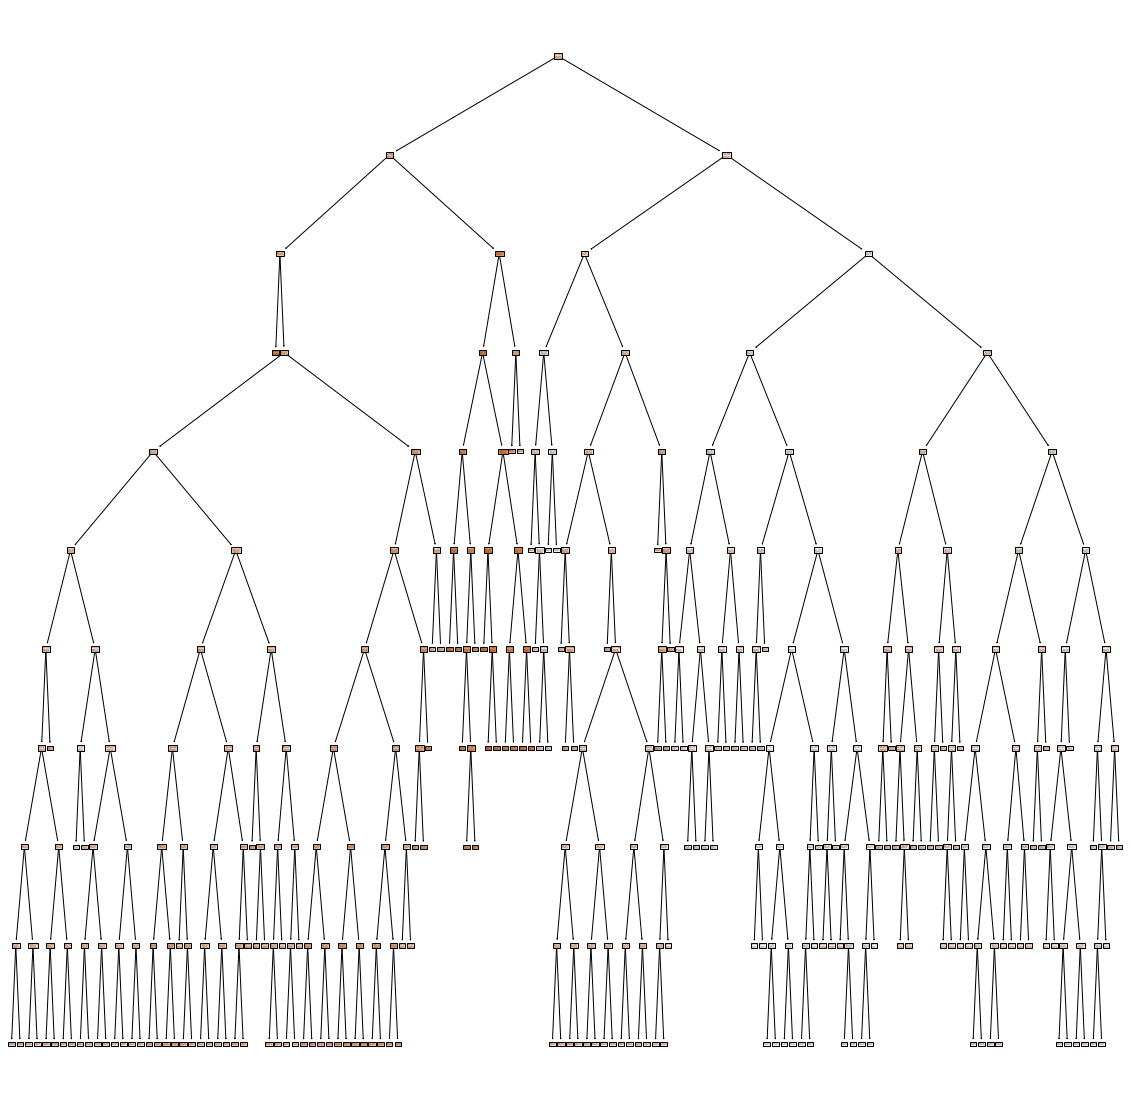

In [136]:
plt.figure(figsize = (20, 20))
plot_tree(manual_dt, feature_names=v_feature_name, filled = True);

In [144]:
para_depth = list(range(1, 20))
para_split = list(range(2, 40, 2))
para_leaf = list(range(1, 40))

In [145]:
estimator = DecisionTreeRegressor()

# 구하고자 하는 파라미터와 범위
param_grid = {'criterion': ['mse', 'friedman_mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': para_depth,
             'min_samples_split': para_split, 'min_samples_leaf': para_leaf}
# 설명력이 높은 최적 파라미터 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = 'r2', n_jobs= -1) # r2 = 결정계수
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_dt.best_params_))
print('\nbest score: \n{}'.format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(max_depth=7, max_features='auto', min_samples_split=14)

best parameter: 
{'criterion': 'mse', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 14}

best score: 
0.762


In [213]:
# 최종모델 


dt_final = DecisionTreeRegressor(random_state=1234, max_depth=9, min_samples_leaf=5, min_samples_split= 10)
dt_final.fit(df_train_x, df_train_y)

print('학습용 데이터 평가결과: {:.3f}'.format(dt_final.score(df_train_x, df_train_y)))
print('평가용 데이터 평가결과: {:.3f}'.format(dt_final.score(df_test_x, df_test_y)))

학습용 데이터 평가결과: 0.924
평가용 데이터 평가결과: 0.858


###### Ramdom Forest

In [151]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []

# n_estimators 트리 수 변경, 100 ~ 300
para_n_tree = [n_tree * 10 for n_tree in range(1, 15)] # para_n_tree = [10, 20 30, ... 100]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
rf_score_n = pd.DataFrame()
rf_score_n['n_estimators'] = para_n_tree
rf_score_n['TrainScore'] = train_score
rf_score_n['TestScore'] = test_score

In [152]:
# 모델 설명력 확인
rf_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.974,0.886
1,20,0.981,0.905
2,30,0.980,0.903
3,40,0.979,0.899
4,50,0.980,0.898
5,60,0.981,0.900
6,70,0.981,0.899
7,80,0.982,0.900
8,90,0.983,0.900
9,100,0.982,0.900


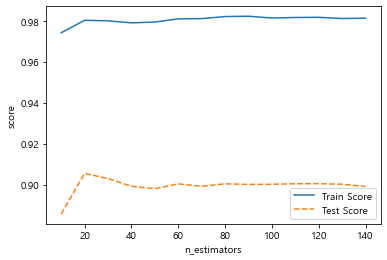

In [153]:
# 모델 설명력 그래프로 확인
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

In [154]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []


para_depth = [depth for depth in range(1, 11)] # para_n_tree = [1, 2, 3, 4, ..., 10]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 20, max_depth= v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
rf_score_depth = pd.DataFrame()
rf_score_depth['MinSamplesLeaf'] = para_depth
rf_score_depth['TrainScore'] = train_score
rf_score_depth['TestScore'] = test_score

In [155]:
# 모델 설명력 확인
rf_score_depth.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.569,0.590
1,2,0.767,0.785
2,3,0.878,0.856
3,4,0.919,0.882
4,5,0.943,0.894
5,6,0.959,0.897
6,7,0.966,0.897
7,8,0.974,0.903
8,9,0.977,0.900
9,10,0.979,0.901


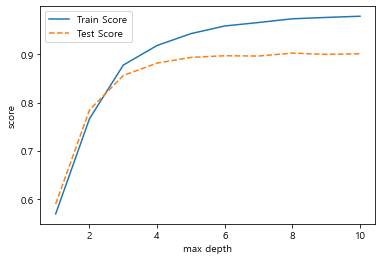

In [156]:
# 모델 설명력 그래프로 확인
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

In [198]:
# 최적 parameter 설정 후 최종 모델 생성

rf_final = RandomForestRegressor(random_state=1234, n_estimators = 80, max_depth = 7, min_samples_leaf=4)
rf_final.fit(df_train_x, df_train_y)
print('Score on training set: {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.924
Score on test set: 0.884


In [199]:
rf_final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

###### Boosting

In [161]:
# 기본 모델 생성

gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# 데이터 설명력

print('학습용 데이터의 모델 설명력: {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
print('평가용 데이터의 모델 설명력: {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))  

학습용 데이터의 모델 설명력: 0.981
평가용 데이터의 모델 설명력: 0.904


In [162]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []

# n_estimators 트리 수 변경, 10 ~ 100
para_n_tree = [n_tree * 10 for n_tree in range(1, 25)] # para_n_tree = [10, 20 30, ... 100]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators=v_n_estimators, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [163]:
# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.770,0.753
1,20,0.907,0.866
2,30,0.943,0.888
3,40,0.958,0.896
4,50,0.965,0.899
5,60,0.970,0.902
6,70,0.975,0.904
7,80,0.978,0.904
8,90,0.979,0.903
9,100,0.981,0.904


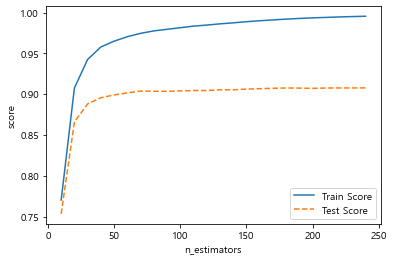

In [164]:
# 모델 설명력 그래프로 확인
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

In [ ]:
# n 50

In [165]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []


para_depth = [depth for depth in range(1, 21)] # para_n_tree = [1, 2, 3, 4, ..., 10]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(min_samples_leaf= 11, random_state=1234, n_estimators = 30, min_samples_split=22, max_depth= v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [167]:
# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.759,0.769
1,2,0.856,0.842
2,3,0.904,0.878
3,4,0.932,0.890
4,5,0.938,0.887
5,6,0.945,0.891
6,7,0.949,0.888
7,8,0.949,0.893
8,9,0.950,0.891
9,10,0.951,0.891


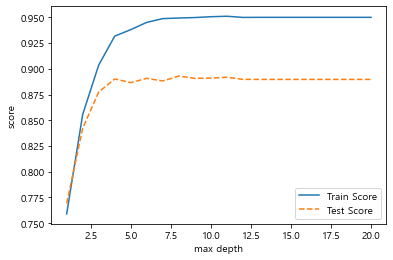

In [166]:
# 모델 설명력 그래프로 확인
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

In [ ]:
# depth 8

In [ ]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 60, max_depth = 5)
     Score on training set: 0.995
Score on test set: 0.897                                

In [187]:
# 최적 parameter 설정 후 최종 모델 생성

gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 100, max_depth = 5, min_samples_leaf=4)
gb_final.fit(df_train_x, df_train_y)

print('Score on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.997
Score on test set: 0.909


In [185]:
gb_final.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 60,
 'n_iter_no_change': None,
 'random_state': 1234,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# 5. 모델 평가하기

In [209]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [210]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [215]:
# Decison tree
dt_final = DecisionTreeRegressor(random_state=1234, max_depth=9, min_samples_leaf=5, min_samples_split= 10)
dt_final.fit(df_train_x, df_train_y)
print('학습용 데이터 평가결과: {:.3f}'.format(dt_final.score(df_train_x, df_train_y)))
print('평가용 데이터 평가결과: {:.3f}'.format(dt_final.score(df_test_x, df_test_y)))

학습용 데이터 평가결과: 0.924
평가용 데이터 평가결과: 0.858


In [219]:
# Random Forest
rf_final = RandomForestRegressor(random_state=1234, n_estimators = 80, max_depth = 7, min_samples_leaf=4)
rf_final.fit(df_train_x, df_train_y)
print('Score on training set: {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))

rf_final.get_params()

Score on training set: 0.924
Score on test set: 0.884


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [218]:
# Gradient boosting

gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 100, max_depth = 5, min_samples_leaf=4)
gb_final.fit(df_train_x, df_train_y)

print('Score on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.997
Score on test set: 0.909


- 모델 평가지표 계산

In [222]:
models = ['의사결정나무', '랜덤포레스트', '그래디언트부스팅']
mse, mae, mape, rmse = [], [], [], []

# 의사결정나무 옟측
dt_y_pred = dt_final.predict(df_test_x)
# 의사결정나무 평가
mse.append(mean_absolute_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))

# 랜덤포레스트 예측
rf_y_pred = rf_final.predict(df_test_x)
# 랜덤포레스트 평가
mse.append(mean_absolute_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))

# 그래디언트 부스팅 예측
gb_y_pred =  gb_final.predict(df_test_x)
# 그래디언트 부스팅 평가
mse.append(mean_absolute_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))


In [223]:
from sklearn.metrics import r2_score

In [225]:
r2_train, r2_test = [], []
r2_train.append(r2_score(df_train_y, dt_final.predict(df_train_x)))
r2_test.append(r2_score(df_test_y, dt_y_pred))

r2_train.append(r2_score(df_train_y, rf_final.predict(df_train_x)))
r2_test.append(r2_score(df_test_y, rf_y_pred))

r2_train.append(r2_score(df_train_y, gb_final.predict(df_train_x)))
r2_test.append(r2_score(df_test_y, gb_y_pred))

In [226]:
model_df = pd.DataFrame({'모델명': models, 'MSE': mse, 'MAE': mae, 'MAPE': mape, 'RMSE': rmse, '학습설명력': r2_train, '평가설명력': r2_test})
model_df

,모델명,MSE,MAE,MAPE,RMSE,학습설명력,평가설명력
0,의사결정나무,2.546788,2.546788,0.131153,3.612775,0.923633,0.858406
1,랜덤포레스트,2.253093,2.253093,0.118591,3.273073,0.924046,0.883782
2,그래디언트부스팅,1.941552,1.941552,0.100493,2.903213,0.996639,0.908563


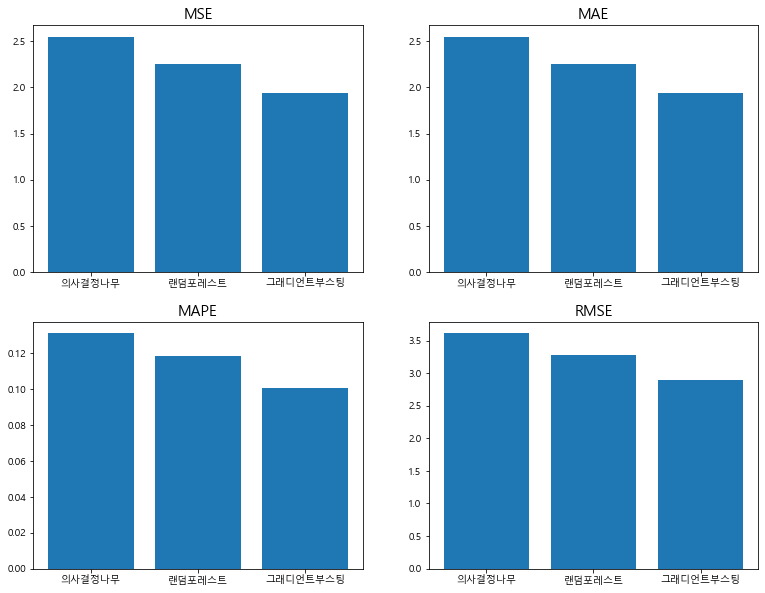

In [227]:
fig, ax = plt.subplots(2, 2, figsize = (13, 10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title('MSE').set_fontsize(15)

ax[0, 1].bar(models, mae)
ax[0, 1].set_title('MAE').set_fontsize(15)

ax[1, 0].bar(models, mape)
ax[1, 0].set_title('MAPE').set_fontsize(15)

ax[1, 1].bar(models, rmse)
ax[1, 1].set_title('RMSE').set_fontsize(15)

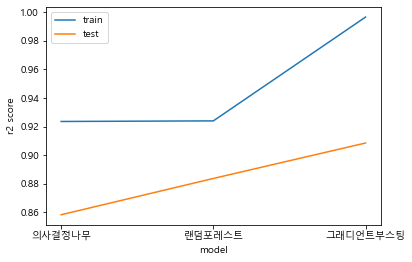

In [253]:
plt.plot(model_df['모델명'], model_df['학습설명력'])
plt.plot(model_df['모델명'], model_df['평가설명력'])
plt.legend(['train', 'test'])
plt.xlabel('model')
plt.ylabel('r2 score')
plt.show()